In [2]:
import nibabel as nb

### Make sure the headers of the bold niftis correspond to the json

In [54]:
# for run in [1,2,3,4,5]:
for run in [2]:
    image = nb.load('/data/sourcedata/sub-012/func/sub-012_task-binoculardots055_run-%d_bold.nii.gz' % run)
    image.header['pixdim'][4] = 6500
    image.to_filename('/data/sourcedata/sub-012/func/sub-012_task-binoculardots055_run-%d_bold.nii.gz' % run)

In [45]:
for run in [1,2,3,4,5]:
    image = nb.load('/data/sourcedata/sub-012/func/sub-012_task-binoculardots070_run-%d_bold.nii.gz' % run)
    image.header['pixdim'][4] = 4000
    image.to_filename('/data/sourcedata/sub-012/func/sub-012_task-binoculardots070_run-%d_bold.nii.gz' % run)

In [46]:
import bids

In [48]:
def compute_echo_spacing(wfs, epi_factor, acceleration):
    return ((1000.0 * wfs) / (434.215 * epi_factor) / acceleration) / 1000.0

### Compute echo spacings

0.55 mm 

In [52]:
compute_echo_spacing(46.977, 19, 3)

0.0018980410504861468

In [53]:
compute_echo_spacing(46.977, 19, 3) * 19

0.03606277995923679

0.70 mm

In [49]:
compute_echo_spacing(53.034, 27, 3)

0.0015078722309011454

In [50]:
compute_echo_spacing(53.034, 27, 3) * 27

0.04071255023433092

### Make jsons for the TOPUP EPIs

#### 0.55 mm

In [1]:
import json

In [2]:
subj_idx = '012'

for run in [1,2,3,4,5]:

    pars = {'PhaseEncodingDirection': "i-",
            'TotalReadoutTime':0.03606277995923679,
            "IntendedFor": "func/sub-{subj_idx}_task-binoculardots055_run-{run}_bold.nii.gz".format(**locals())
        }
    
    fn = '/data/sourcedata/sub-{subj_idx}/fmap/sub-{subj_idx}_task-binoculardots055_run-{run}_epi.json'.format(**locals())
    
    with open(fn, 'w+') as f:
        json.dump(pars, f)

#### 0.70 mm

In [3]:
subj_idx = '012'

for run in [1,2,3,4,5]:

    pars = {'PhaseEncodingDirection': "i-",
            'TotalReadoutTime':0.04071255023433092,
            "IntendedFor": "func/sub-{subj_idx}_task-binoculardots070_run-{run}_bold.nii.gz".format(**locals())
        }
    
    fn = '/data/sourcedata/sub-{subj_idx}/fmap/sub-{subj_idx}_task-binoculardots070_run-{run}_epi.json'.format(**locals())
    
    with open(fn, 'w+') as f:
        json.dump(pars, f)

### Remove Phase volumes from TOPUPS

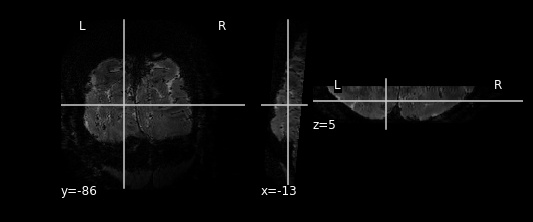

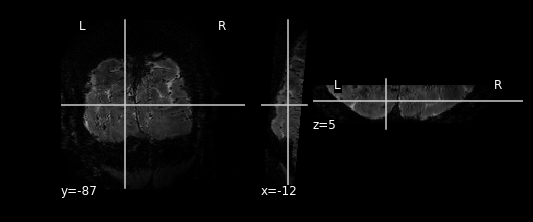

In [10]:
image = nb.load('/data/sourcedata/sub-012/fmap/sub-012_task-binoculardots070_run-1_epi_trash.nii.gz')
data = image.get_data()

data = data[..., ::2]

new_image = nb.Nifti1Image(data, image.affine, image.header)
new_image.to_filename('/data/sourcedata/sub-012/fmap/sub-012_task-binoculardots070_run-1_epi.nii.gz')

from nilearn import plotting
from nilearn.image import index_img
%matplotlib inline
plotting.plot_anat(index_img(new_image, 0))
plotting.plot_anat(index_img(new_image, 1))

(192, 34, 192, 10) (192, 34, 192, 5)
(192, 34, 192, 10) (192, 34, 192, 5)
(192, 34, 192, 10) (192, 34, 192, 5)
(192, 34, 192, 10) (192, 34, 192, 5)
(192, 34, 192, 10) (192, 34, 192, 5)


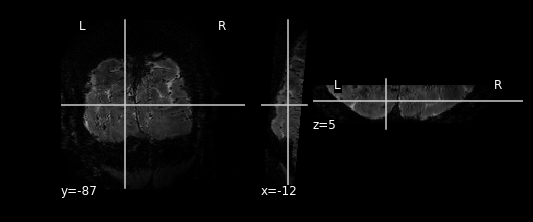

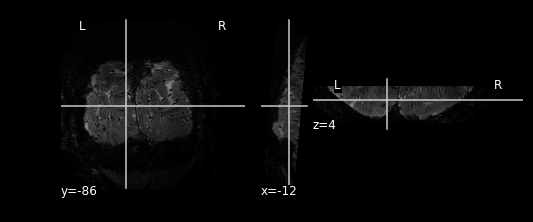

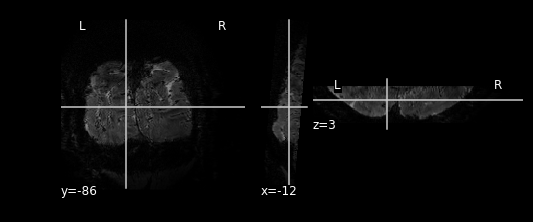

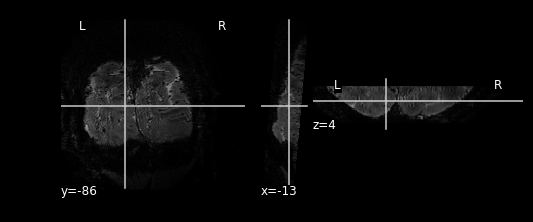

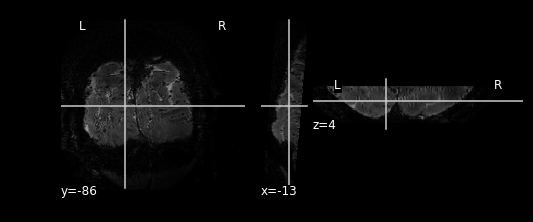

In [13]:
for run in [1,2,3,4,5]:
    image = nb.load('/data/sourcedata/sub-012/fmap/sub-012_task-binoculardots070_run-{}_epi_trash.nii.gz'.format(run))
    data = image.get_data()

    data = data[..., ::2]

    new_image = nb.Nifti1Image(data, image.affine, image.header)
    new_image.to_filename('/data/sourcedata/sub-012/fmap/sub-012_task-binoculardots070_run-{}_epi.nii.gz'.format(run))
    print(image.shape, new_image.shape)
    plotting.plot_anat(index_img(new_image, 1))

### Test out the BIDS structure

In [1]:
import bids
from bids.grabbids import BIDSLayout


In [2]:
layout = BIDSLayout('/data/sourcedata/')

In [4]:
layout.get_subjects(), layout.get_tasks()

(['012'], ['binoculardots055', 'binoculardots070'])

In [6]:
layout.get_fmaps()

['epi']

In [12]:
layout.get_fieldmap('sub-012/func/sub-012_task-binoculardots055_run-1_bold.nii.gz')

{'epi': '/data/sourcedata/sub-012/fmap/sub-012_task-binoculardots055_run-1_epi.nii.gz',
 'type': 'epi'}

In [13]:
layout.get_metadata('/data/sourcedata/sub-012/fmap/sub-012_task-binoculardots055_run-1_epi.nii.gz')

{'IntendedFor': 'func/sub-012_task-binoculardots055_run-1_bold.nii.gz',
 'PhaseEncodingDirection': ['i-', 'j-'],
 'TotalReadoutTime': 0.03606277995923679}